In [1]:
import os
from dotenv import load_dotenv

load_dotenv()

True

In [2]:
import sys

IMPL_PATH = os.getenv("IMPL_PATH")
sys.path.append(IMPL_PATH)
DATA_PATH = IMPL_PATH + "/data/"
print(DATA_PATH)

/home/hoangbaoan1901/Documents/information-system_UET/sem5/ai/BTL/INT3401-Midterm/implementations/data/


### HYPER-PARAM

In [3]:
TIME_STEP = 6
FUTURE_STEP = 1
N_CLUSTERS = 4

### Training configs:
1. XGB classifier, Random Forest Classifier
2. Random Forest regression, MLP regression

### Load data from pickle files (made from 1_group_data.ipynb)

In [4]:
import pickle
import pandas as pd
import numpy as np

train_4_clusters = pickle.load(open(DATA_PATH + "train_4_clusters.pkl", "rb"))
test_4_clusters = pickle.load(open(DATA_PATH + "test_4_clusters.pkl", "rb"))
train_10_clusters = pickle.load(open(DATA_PATH + "train_10_clusters.pkl", "rb"))
test_10_clusters = pickle.load(open(DATA_PATH + "test_10_clusters.pkl", "rb"))

In [5]:
# More insights
print(type(train_4_clusters))
print(type(train_4_clusters[0]))
print(type(train_4_clusters[0][list(train_4_clusters[0].keys())[0]]))
train_4_clusters[0][list(train_4_clusters[0].keys())[0]].head()

<class 'list'>
<class 'dict'>
<class 'pandas.core.frame.DataFrame'>


date  aws    imerge      tclw     cape       r850       tcwv  \
0 2019-04-05 00:00:00  0.0  0.000000  0.601746  764.875  101.99864  40.422440   
1 2019-04-05 01:00:00  0.0  2.344666  0.718018  718.250  101.55731  40.268112   
2 2019-04-05 02:00:00  0.0  0.000000  0.726501  641.500  100.97389  40.492720   
3 2019-04-05 03:00:00  0.0  0.000000  0.802307  657.750  101.41234  41.193832   
4 2019-04-05 04:00:00  0.0  0.000000  0.789673  768.375  101.11197  41.474990   

         tcw      isor       cin  ...       b14b       b12b        wvb  \
0  41.102127  0.639833  1.234695  ...  284.33180  261.34055  241.05534   
1  41.090378  0.639833  1.609385  ...  269.04214  253.95319  233.24005   
2  41.336470  0.639833  4.781275  ...  265.27927  251.04973  230.30144   
3  42.069046  0.639833  0.922052  ...  250.11890  241.74947  227.51172   
4  42.352478  0.639833  1.031371  ...  269.80673  252.86195  231.27336   

        b10b        i4b       b11b        i2b       b09b       b16b        irb  
0  262.45953  287.18150  281.60117  282.42870  254.15454  269.72195  284.27634  
1  252.26457  285.38474  269.76950  266.40400  244.32185  255.54140  270.90137  
2  248.32812  288.52264  265.98843  262.90793  239.77428  253.72685  266.85617  
3  239.57889  274.33460  251.26399  248.57503  234.14128  242.58984  251.76514  
4  250.37960  293.51816  269.01328  267.80804  241.04387  257.99274  270.40110  

[5 rows x 22 columns]

### For each month, for each cluster, convert the dictionary into corresponding X and y

In [6]:
import data_processors as dp
ts_processor = dp.TimeSeriesProcessor(time_step=TIME_STEP, future_step=FUTURE_STEP)
train_4_clustered_list = []
test_4_clustered_list = []
train_10_clustered_list = []
test_10_clustered_list = []

for cluster in range(N_CLUSTERS):
	train_4_clustered_list.append(ts_processor.get_lagged_data_for_cluster(train_4_clusters[cluster]))
	test_4_clustered_list.append(ts_processor.get_lagged_data_for_cluster(test_4_clusters[cluster]))
	train_10_clustered_list.append(ts_processor.get_lagged_data_for_cluster(train_10_clusters[cluster]))
	test_10_clustered_list.append(ts_processor.get_lagged_data_for_cluster(test_10_clusters[cluster]))



df.shape: (1032, 22)
find_continuous: len(continuous_dfs): 58
create_lagged_data-df.shape:(54, 21)
create_lagged-data-df_lagged.shape(54, 27)
create_lagged_data: X shape: (53, 21), y shape: (53,)
create_lagged_data-df.shape:(23, 21)
create_lagged-data-df_lagged.shape(23, 27)
create_lagged_data: X shape: (22, 21), y shape: (22,)
create_lagged_data-df.shape:(21, 21)
create_lagged-data-df_lagged.shape(21, 27)
create_lagged_data: X shape: (20, 21), y shape: (20,)
create_lagged_data-df.shape:(20, 21)
create_lagged-data-df_lagged.shape(20, 27)
create_lagged_data: X shape: (19, 21), y shape: (19,)
create_lagged_data-df.shape:(13, 21)
create_lagged-data-df_lagged.shape(13, 27)
create_lagged_data: X shape: (12, 21), y shape: (12,)
time_step + future_step - 1 = 6 must be less than the length of the DataFrame(1)
time_step + future_step - 1 = 6 must be less than the length of the DataFrame(3)
create_lagged_data-df.shape:(20, 21)
create_lagged-data-df_lagged.shape(20, 27)
create_lagged_data: X shap

In [7]:
# test for april training data
print(len(train_4_clustered_list)) # 4 Cluster
train_4_cluster_0 = train_4_clustered_list[0] # lots of train data
X, y = train_4_cluster_0
print(X.shape)
print(y.shape)

# Count number of nan values
print(np.sum(np.isnan(X)))
print(np.sum(np.isnan(y)))

# Count number of 0 values
print(np.sum(X == 0))
print(np.sum(y == 0))

4
(30567, 21)
(30567,)
0
0
57608
28494


### Classification
#### Encode y for training and test sets

In [8]:
train_4_clustered_list_classification = []
test_4_clustered_list_classification = []
train_10_clustered_list_classification = []
test_10_clustered_list_classification = []

for cluster in range(N_CLUSTERS):
	X_4_train, y_4_train = train_4_clustered_list[cluster]
	X_4_test, y_4_test = test_4_clustered_list[cluster]
	X_10_train, y_10_train = train_10_clustered_list[cluster]
	X_10_test, y_10_test = test_10_clustered_list[cluster]

	y_4_train = np.where(y_4_train > 0, 1, 0)
	y_4_test = np.where(y_4_test > 0, 1, 0)
	y_10_train = np.where(y_10_train > 0, 1, 0)
	y_10_test = np.where(y_10_test > 0, 1, 0)

	train_4_clustered_list_classification.append([X_4_train, y_4_train])
	test_4_clustered_list_classification.append([X_4_test, y_4_test])
	train_10_clustered_list_classification.append([X_10_train, y_10_train])
	test_10_clustered_list_classification.append([X_10_test, y_10_test])

#### Imbalance handling for training sets

In [9]:
from imblearn.combine import SMOTEENN

train_4_clustered_list_resampled_smoteenn = []
train_10_clustered_list_resampled_smoteenn = []

for cluster in range(N_CLUSTERS):
	X, y = train_4_clustered_list_classification[cluster]
	model = SMOTEENN()
	imbl_processor = dp.ImbalanceProcessor(model)
	X_resampled, y_resampled = imbl_processor.process_imbalance(X, y)
	train_4_clustered_list_resampled_smoteenn.append([X_resampled, y_resampled])
	print(X_resampled.shape)
	print(y_resampled.shape)

	X, y = train_10_clustered_list_classification[cluster]
	model = SMOTEENN()
	imbl_processor = dp.ImbalanceProcessor(model)
	X_resampled, y_resampled = imbl_processor.process_imbalance(X, y)
	train_10_clustered_list_resampled_smoteenn.append([X_resampled, y_resampled])
	print(X_resampled.shape)
	print(y_resampled.shape)

(49008, 21)
(49008,)
(46087, 21)
(46087,)
(96723, 21)
(96723,)
(20753, 21)
(20753,)
(85220, 21)
(85220,)
(63177, 21)
(63177,)
(42202, 21)
(42202,)
(27413, 21)
(27413,)


#### Create classification models and evaluate

In [10]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

april_models_classification = [] # 4 items for 4 clusters, each item contains 2 models
october_models_classification = [] # 4 items for 4 clusters, each item contains 2 models

for cluster in range(N_CLUSTERS):
	X_4, y_4 = train_4_clustered_list_resampled_smoteenn[cluster]
	class_weight_4 = {0: y_4[y_4 == 0].shape[0], 1: y_4[y_4 == 1].shape[0]}
	X_10, y_10 = train_10_clustered_list_resampled_smoteenn[cluster]
	class_weight_10 = {0: y_10[y_10 == 0].shape[0], 1: y_10[y_10 == 1].shape[0]}
	rfc_4 = RandomForestClassifier(n_estimators=250, max_depth=10, class_weight=class_weight_4)
	rfc_10 = RandomForestClassifier(n_estimators=250, max_depth=10, class_weight=class_weight_10)
	xgb_4 = XGBClassifier(n_estimators=250, max_depth=10, scale_pos_weight=class_weight_4[0]/class_weight_4[1])
	xgb_10 = XGBClassifier(n_estimators=250, max_depth=10, scale_pos_weight=class_weight_10[0]/class_weight_10[1])
	rfc_4.fit(X_4, y_4)
	rfc_10.fit(X_10, y_10)
	xgb_4.fit(X_4, y_4)
	xgb_10.fit(X_10, y_10)
	april_models_classification.append([rfc_4, xgb_4])
	october_models_classification.append([rfc_10, xgb_10])

In [11]:
# Test the models
april_predictions_scores = dict()
october_predictions_scores = dict()
for cluster in range(N_CLUSTERS):
	X_4, y_4 = test_4_clustered_list_classification[cluster]
	X_10, y_10 = test_10_clustered_list_classification[cluster]
	rfc_4, xgb_4 = april_models_classification[cluster]
	rfc_10, xgb_10 = october_models_classification[cluster]
	rfc_4_pred = rfc_4.predict(X_4)
	rfc_10_pred = rfc_10.predict(X_10)
	xgb_4_pred = xgb_4.predict(X_4)
	xgb_10_pred = xgb_10.predict(X_10)
	april_predictions_scores[f"rfc_{cluster}"] = [f1_score(y_4, rfc_4_pred), accuracy_score(y_4, rfc_4_pred), precision_score(y_4, rfc_4_pred), recall_score(y_4, rfc_4_pred)]
	april_predictions_scores[f"xgb_{cluster}"] = [f1_score(y_4, xgb_4_pred), accuracy_score(y_4, xgb_4_pred), precision_score(y_4, xgb_4_pred), recall_score(y_4, xgb_4_pred)]
	october_predictions_scores[f"rfc_{cluster}"] = [f1_score(y_10, rfc_10_pred), accuracy_score(y_10, rfc_10_pred), precision_score(y_10, rfc_10_pred), recall_score(y_10, rfc_10_pred)]
	october_predictions_scores[f"xgb_{cluster}"] = [f1_score(y_10, xgb_10_pred), accuracy_score(y_10, xgb_10_pred), precision_score(y_10, xgb_10_pred), recall_score(y_10, xgb_10_pred)]
	

In [12]:
print(april_predictions_scores)
print(october_predictions_scores)

# Convert to pandas dataframe
april_predictions_scores_df = pd.DataFrame(april_predictions_scores, index=["f1", "accuracy", "precision", "recall"])
october_predictions_scores_df = pd.DataFrame(october_predictions_scores, index=["f1", "accuracy", "precision", "recall"])

print(april_predictions_scores_df.shape)
print(october_predictions_scores_df.shape)

{'rfc_0': [0.18165938864628822, 0.7879130828429154, 0.10307234886025768, 0.7647058823529411], 'xgb_0': [0.22706065318818042, 0.887505658669081, 0.14398422090729784, 0.5367647058823529], 'rfc_1': [0.31442463533225284, 0.8822874634757201, 0.20399579390115669, 0.6855123674911661], 'xgb_1': [0.37865748709122204, 0.9497704188117434, 0.3691275167785235, 0.38869257950530034], 'rfc_2': [0.375, 0.8401102687801516, 0.24874910650464618, 0.7614879649890591], 'xgb_2': [0.39635535307517084, 0.8904203997243281, 0.30348837209302326, 0.5711159737417943], 'rfc_3': [0.2962962962962963, 0.8677110530896431, 0.20253164556962025, 0.5517241379310345], 'xgb_3': [0.325434439178515, 0.8761241659413983, 0.22440087145969498, 0.5919540229885057]}
{'rfc_0': [0.5999949053671957, 0.7669486494508756, 0.43917810262529833, 0.9466280845591191], 'xgb_0': [0.6899996555168969, 0.8664440486791333, 0.6037496985772848, 0.8049995981030463], 'rfc_1': [0.8195698924731183, 0.8149332745119665, 0.7181758221049656, 0.9543007387003881]

In [13]:
april_predictions_scores_df.head()

rfc_0     xgb_0     rfc_1     xgb_1     rfc_2     xgb_2  \
f1         0.181659  0.227061  0.314425  0.378657  0.375000  0.396355   
accuracy   0.787913  0.887506  0.882287  0.949770  0.840110  0.890420   
precision  0.103072  0.143984  0.203996  0.369128  0.248749  0.303488   
recall     0.764706  0.536765  0.685512  0.388693  0.761488  0.571116   

              rfc_3     xgb_3  
f1         0.296296  0.325434  
accuracy   0.867711  0.876124  
precision  0.202532  0.224401  
recall     0.551724  0.591954

In [14]:
october_predictions_scores_df.head()

rfc_0     xgb_0     rfc_1     xgb_1     rfc_2     xgb_2  \
f1         0.599995  0.690000  0.819570  0.828106  0.502182  0.560087   
accuracy   0.766949  0.866444  0.814933  0.832855  0.783239  0.861685   
precision  0.439178  0.603750  0.718176  0.756894  0.354384  0.469595   
recall     0.946628  0.805000  0.954301  0.914110  0.861460  0.693781   

              rfc_3     xgb_3  
f1         0.659096  0.703622  
accuracy   0.761268  0.826027  
precision  0.510278  0.609236  
recall     0.930455  0.832614

In [ ]:
RESULT_PATH = IMPL_PATH + f"/results/traditional_ml/ts{TIME_STEP}_fs{FUTURE_STEP}/"
april_predictions_scores_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_april_predictions_scores_df.csv")
october_predictions_scores_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_october_predictions_scores_df.csv")

### Regression model on overall data

In [ ]:
import matplotlib.pyplot as plt
def draw_scatter_plot(y_true, y_pred, title, model_name, month, cluster, optional=""):
    plt.scatter(y_true, y_pred)
    plt.title(title)
    plt.xlabel("True")
    plt.ylabel("Predicted")
    plt.savefig(RESULT_PATH + f"{model_name}_{month}-ts{TIME_STEP}_fs{FUTURE_STEP}_cluster_{cluster}{optional}.png")
    plt.show()

In [17]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import root_mean_squared_error, r2_score, mean_absolute_error

april_models_reg = [] # 4 models for 4 clusters
october_models_reg = [] # 4 models for 4 clusters

for cluster in range(N_CLUSTERS):
    X_4, y_4 = train_4_clustered_list[cluster]
    X_10, y_10 = train_10_clustered_list[cluster]
    rfr_4 = RandomForestRegressor(n_estimators=250, max_depth=10)
    rfr_10 = RandomForestRegressor(n_estimators=250, max_depth=10)
    xgbr_4 = XGBRegressor(n_estimators=250, max_depth=10)
    xgbr_10 = XGBRegressor(n_estimators=250, max_depth=10)
    rfr_4.fit(X_4, y_4)
    rfr_10.fit(X_10, y_10)
    xgbr_4.fit(X_4, y_4)
    xgbr_10.fit(X_10, y_10)
    april_models_reg.append([rfr_4, xgbr_4])
    october_models_reg.append([rfr_10, xgbr_10])

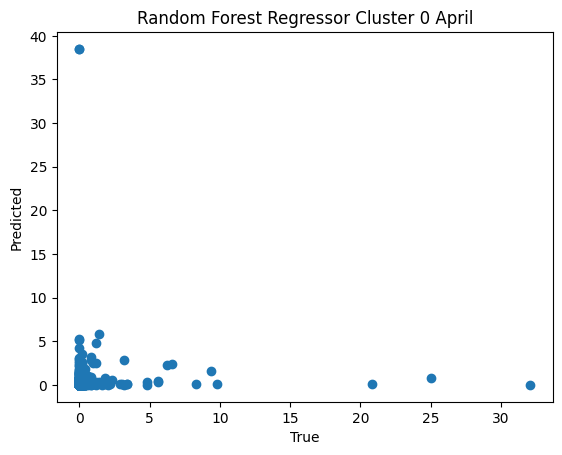

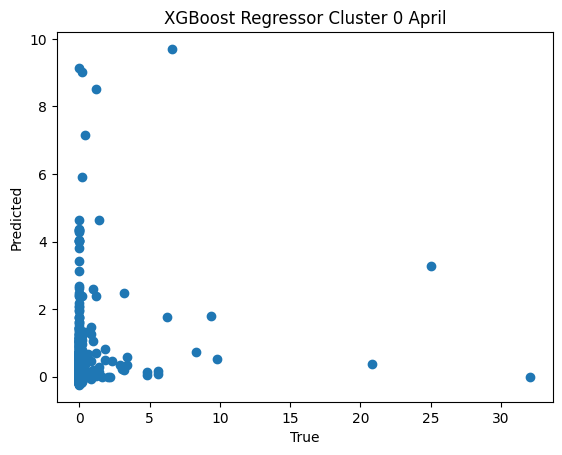

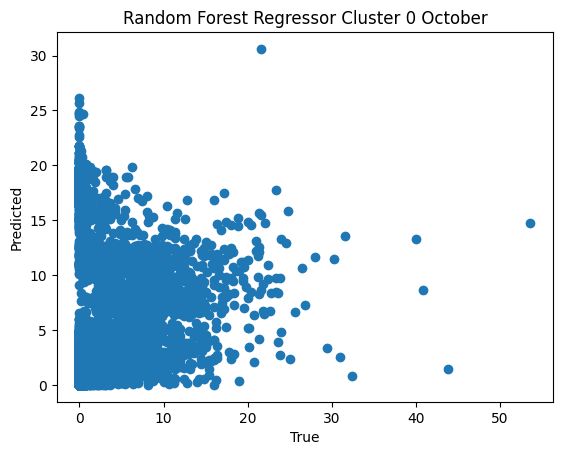

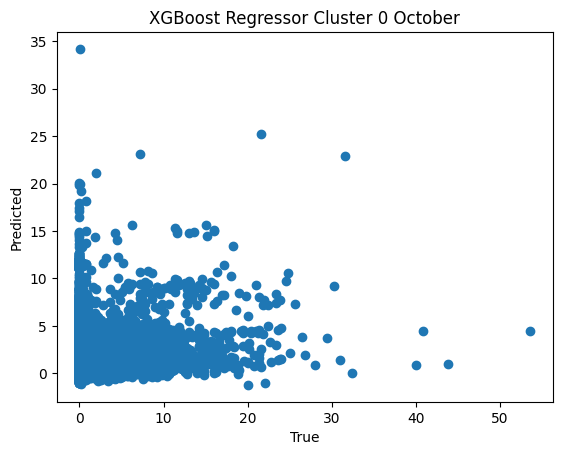

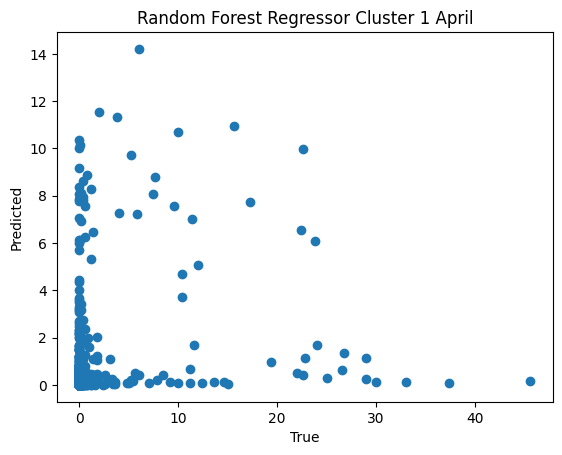

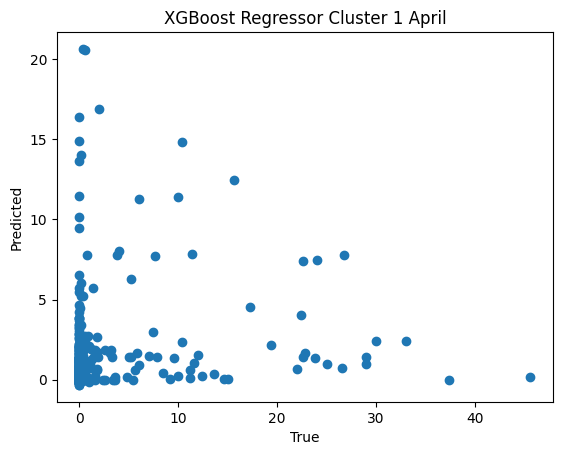

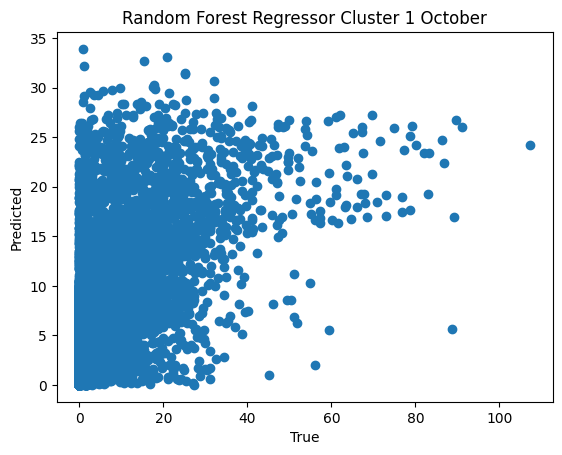

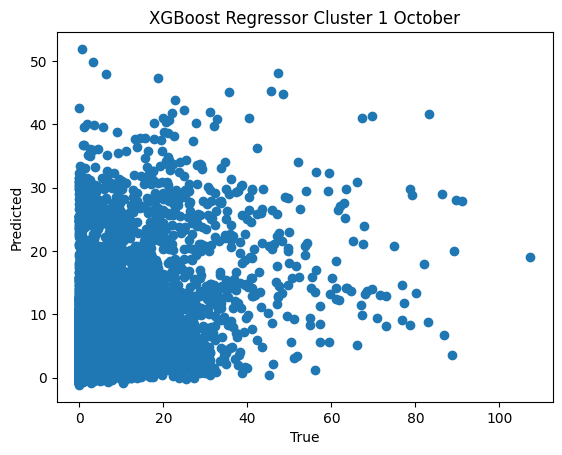

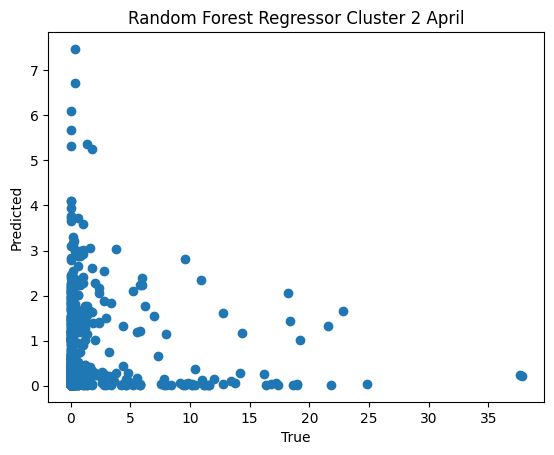

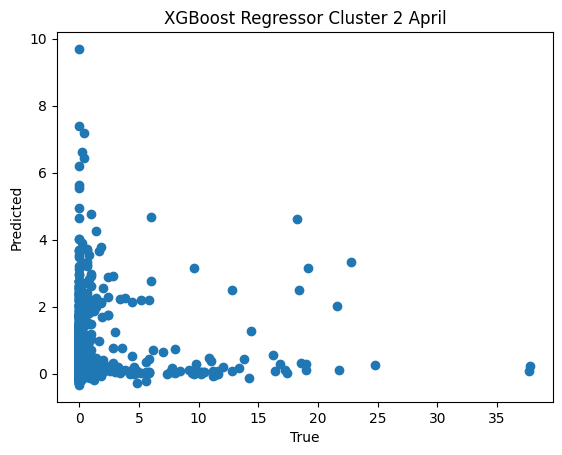

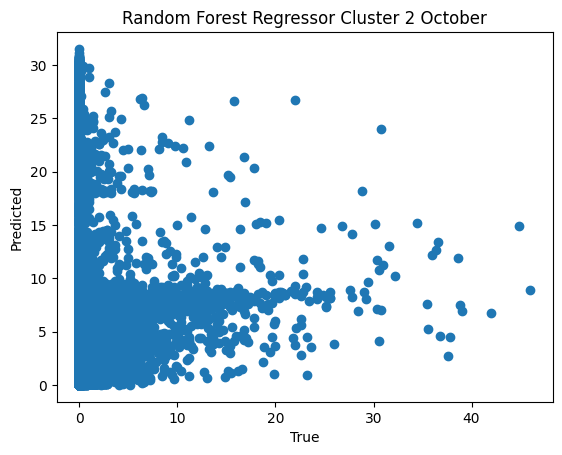

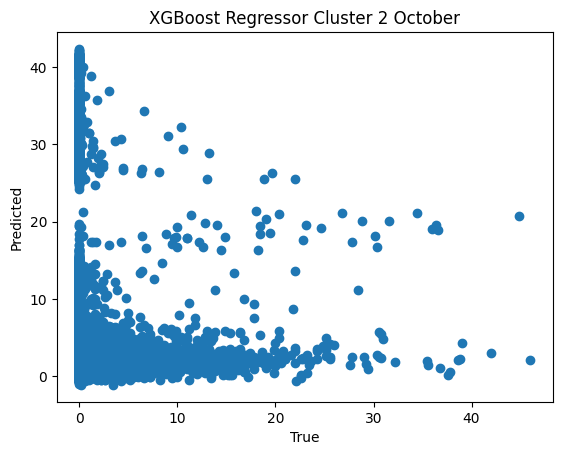

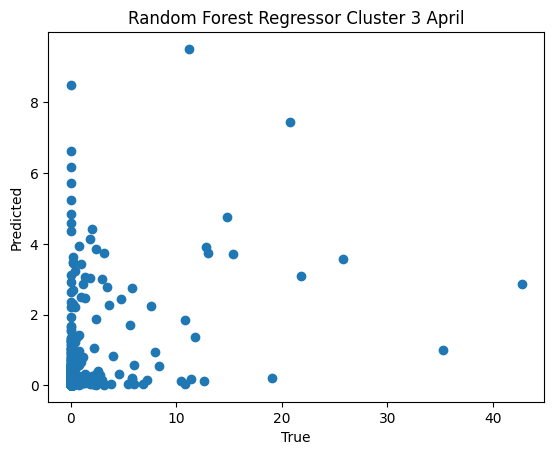

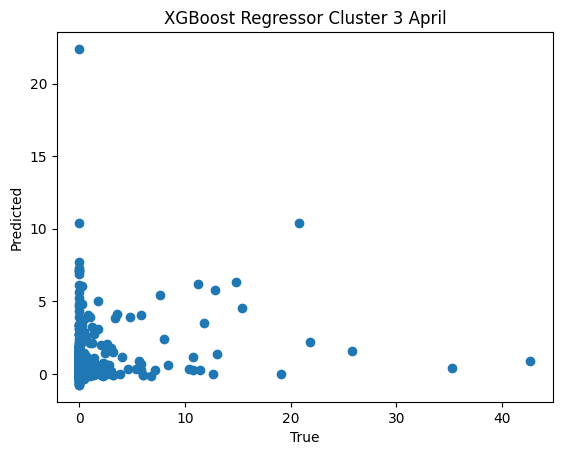

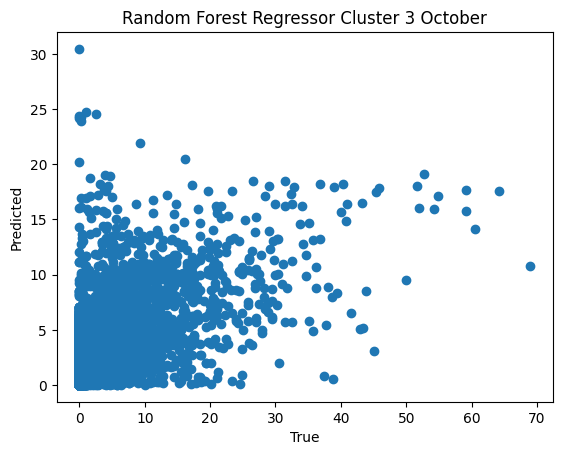

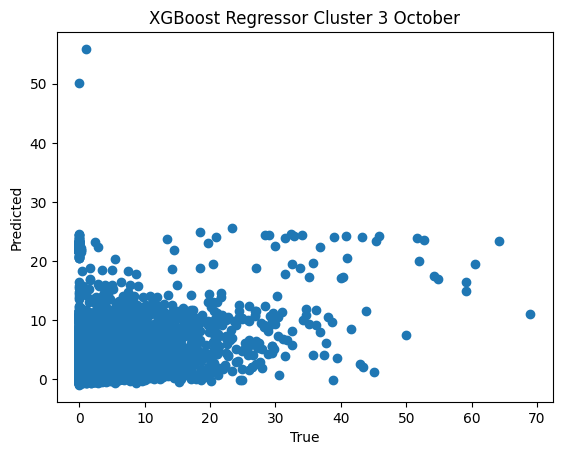

<Figure size 640x480 with 0 Axes>

In [18]:
# Test the models
april_predictions_scores_reg = dict()
october_predictions_scores_reg = dict()

for cluster in range(N_CLUSTERS):
    X_4, y_4 = test_4_clustered_list[cluster]
    X_10, y_10 = test_10_clustered_list[cluster]
    rfr_4, xgbr_4 = april_models_reg[cluster]
    rfr_10, xgbr_10 = october_models_reg[cluster]
    rfr_4_pred = rfr_4.predict(X_4)
    rfr_10_pred = rfr_10.predict(X_10)
    xgbr_4_pred = xgbr_4.predict(X_4)
    xgbr_10_pred = xgbr_10.predict(X_10)
    draw_scatter_plot(y_4, rfr_4_pred, f"Random Forest Regressor Cluster {cluster} April", "rfr", "april", cluster)
    draw_scatter_plot(y_4, xgbr_4_pred, f"XGBoost Regressor Cluster {cluster} April", "xgbr", "april", cluster)
    draw_scatter_plot(y_10, rfr_10_pred, f"Random Forest Regressor Cluster {cluster} October", "rfr", "october", cluster)
    draw_scatter_plot(y_10, xgbr_10_pred, f"XGBoost Regressor Cluster {cluster} October", "xgbr", "october", cluster)
    april_predictions_scores_reg[f"rfr_{cluster}"] = [root_mean_squared_error(y_4, rfr_4_pred), r2_score(y_4, rfr_4_pred), mean_absolute_error(y_4, rfr_4_pred)]
    april_predictions_scores_reg[f"xgbr_{cluster}"] = [root_mean_squared_error(y_4, xgbr_4_pred), r2_score(y_4, xgbr_4_pred), mean_absolute_error(y_4, xgbr_4_pred)]
    october_predictions_scores_reg[f"rfr_{cluster}"] = [root_mean_squared_error(y_10, rfr_10_pred), r2_score(y_10, rfr_10_pred), mean_absolute_error(y_10, rfr_10_pred)]
    october_predictions_scores_reg[f"xgbr_{cluster}"] = [root_mean_squared_error(y_10, xgbr_10_pred), r2_score(y_10, xgbr_10_pred), mean_absolute_error(y_10, xgbr_10_pred)]

In [19]:
# Convert to pandas dataframe
april_predictions_scores_reg_df = pd.DataFrame(april_predictions_scores_reg, index=["rmse", "r2", "mae"])
october_predictions_scores_reg_df = pd.DataFrame(october_predictions_scores_reg, index=["rmse", "r2", "mae"])

In [20]:
april_predictions_scores_reg_df.head()

rfr_0    xgbr_0     rfr_1    xgbr_1     rfr_2    xgbr_2     rfr_3  \
rmse  1.134253  0.829970  1.485742  1.514163  1.336570  1.359706  1.353525   
r2   -1.159550 -0.156294  0.035930 -0.001307  0.000056 -0.034861  0.151548   
mae   0.110230  0.133634  0.176453  0.196184  0.202884  0.277471  0.203337   

        xgbr_3  
rmse  1.484737  
r2   -0.020924  
mae   0.291148

In [21]:
october_predictions_scores_reg_df.head()

rfr_0    xgbr_0     rfr_1    xgbr_1      rfr_2     xgbr_2     rfr_3  \
rmse  3.234842  1.625437  4.301543  5.019037   6.636801   6.827174  2.083569   
r2   -2.963586 -0.000742  0.423926  0.215721 -15.963022 -16.950128  0.389191   
mae   0.904173  0.596684  1.999316  2.258817   2.389746   2.088589  0.765313   

        xgbr_3  
rmse  2.865365  
r2   -0.155179  
mae   1.086242

In [22]:
# Save the results
april_predictions_scores_reg_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_april_predictions_scores_reg_df.csv")
october_predictions_scores_reg_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_october_predictions_scores_reg_df.csv")

### Combine rain only regression and rain classification

In [23]:
# Select only rainy Y values
train_4_clustered_list_rain_only = []
train_10_clustered_list_rain_only = []

for cluster in range(N_CLUSTERS):
    X_4, y_4 = train_4_clustered_list[cluster]
    X_10, y_10 = train_10_clustered_list[cluster]

    y_4_rain = y_4[y_4 > 0]
    X_4_rain = X_4[y_4 > 0]
    y_10_rain = y_10[y_10 > 0]
    X_10_rain = X_10[y_10 > 0]

    train_4_clustered_list_rain_only.append([X_4_rain, y_4_rain])
    train_10_clustered_list_rain_only.append([X_10_rain, y_10_rain])

In [24]:
# Train the model with rain only data
april_models_rain_only = [] # 4 models for 4 clusters
october_models_rain_only = [] # 4 models for 4 clusters

for cluster in range(N_CLUSTERS):
    X_4, y_4 = train_4_clustered_list_rain_only[cluster]
    X_10, y_10 = train_10_clustered_list_rain_only[cluster]
    rfr_4 = RandomForestRegressor(n_estimators=250, max_depth=10)
    rfr_10 = RandomForestRegressor(n_estimators=250, max_depth=10)
    xgbr_4 = XGBRegressor(n_estimators=250, max_depth=10)
    xgbr_10 = XGBRegressor(n_estimators=250, max_depth=10)
    rfr_4.fit(X_4, y_4)
    rfr_10.fit(X_10, y_10)
    xgbr_4.fit(X_4, y_4)
    xgbr_10.fit(X_10, y_10)
    april_models_rain_only.append([rfr_4, xgbr_4])
    october_models_rain_only.append([rfr_10, xgbr_10])

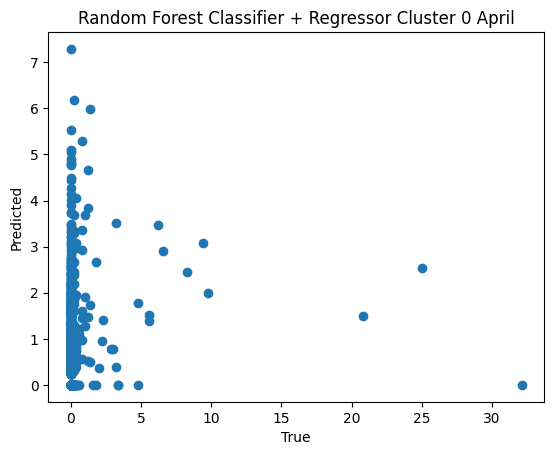

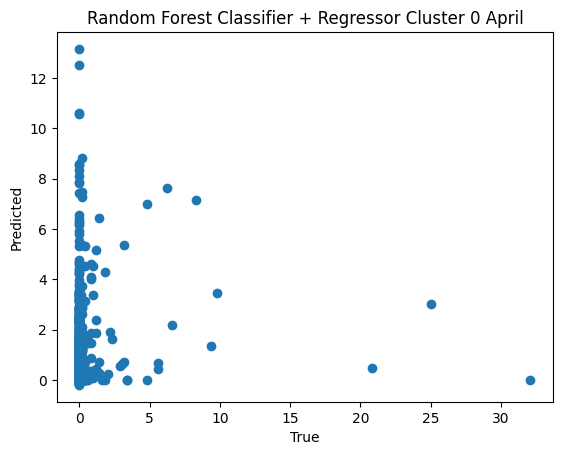

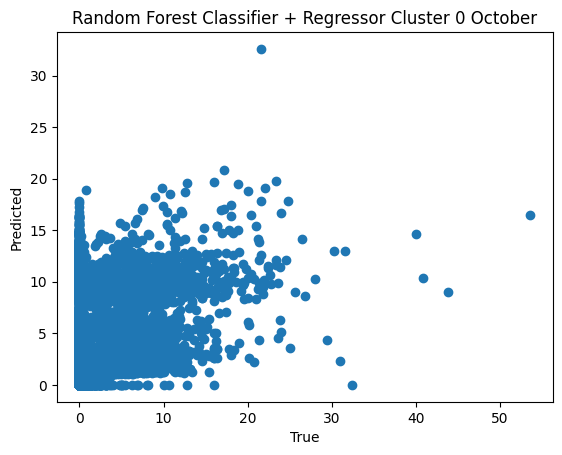

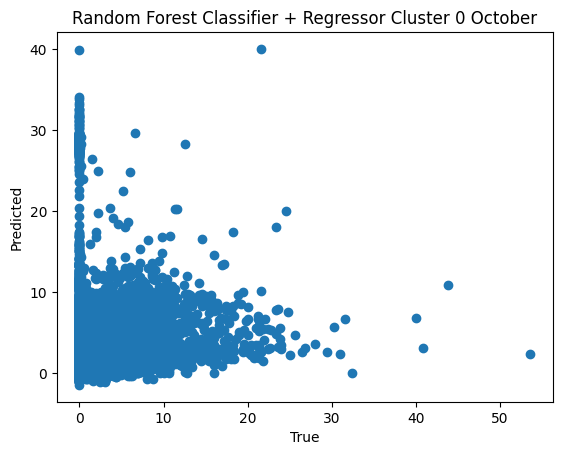

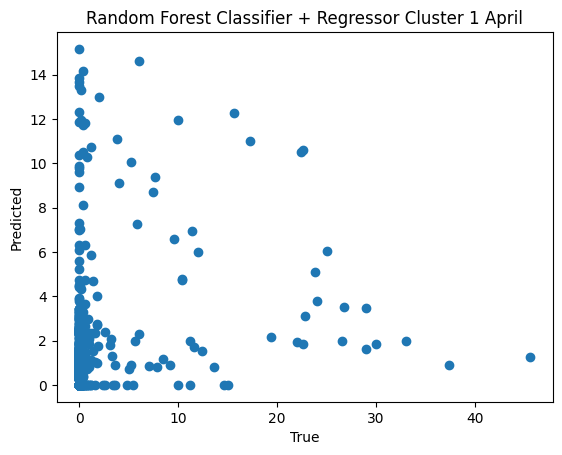

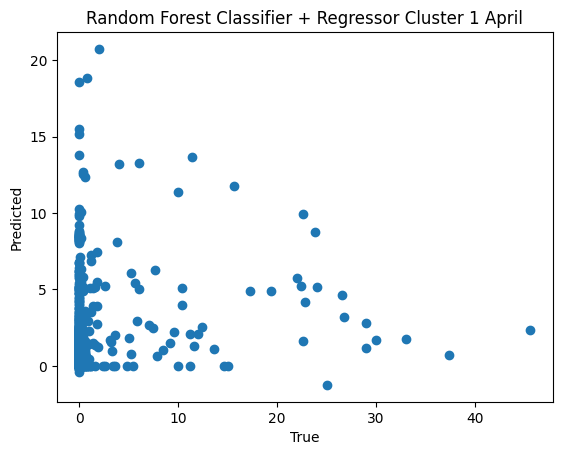

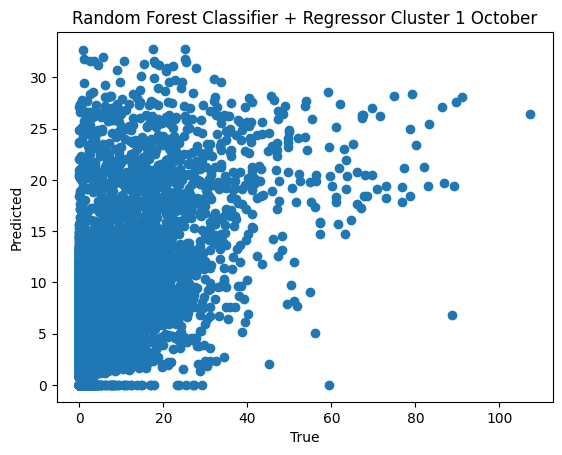

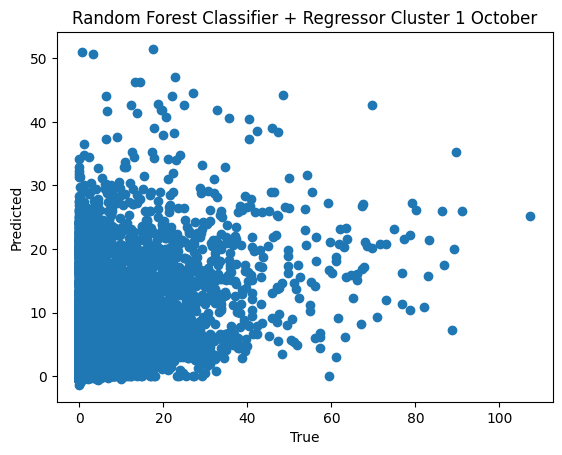

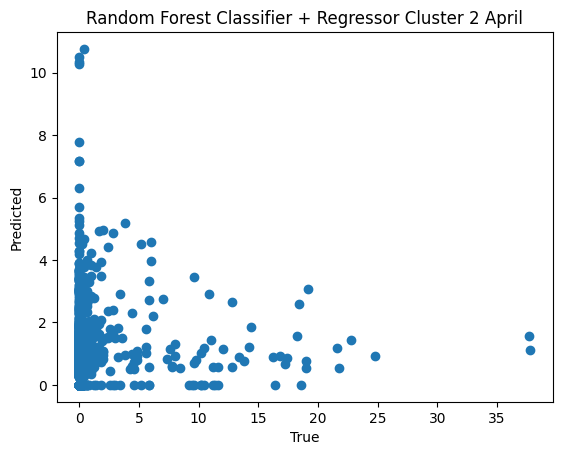

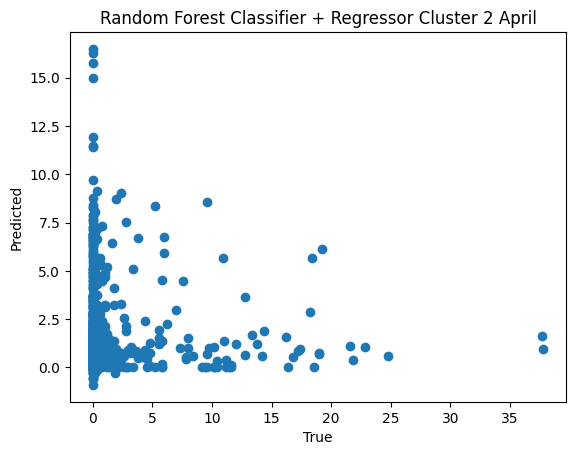

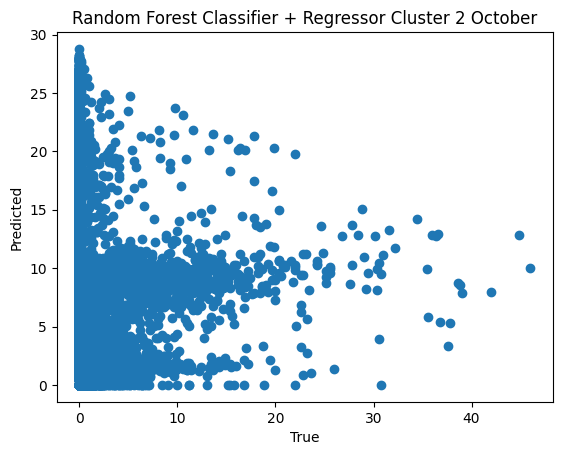

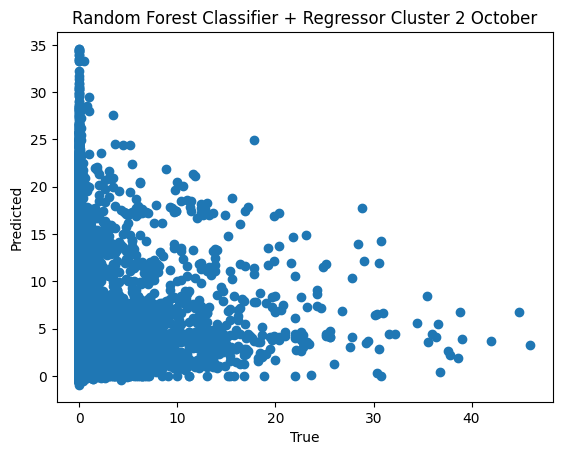

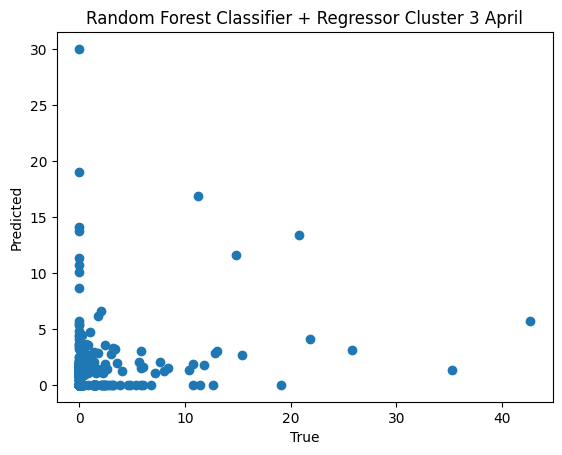

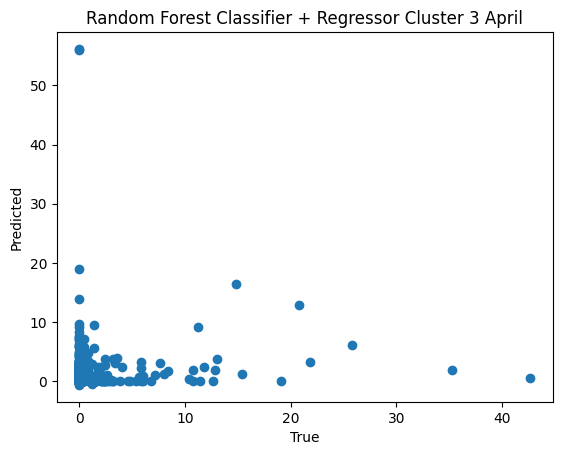

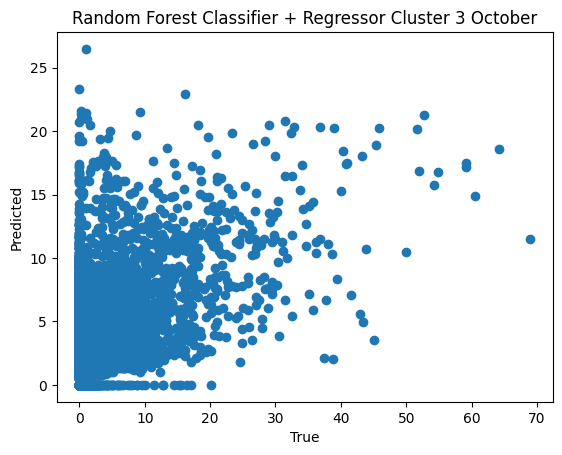

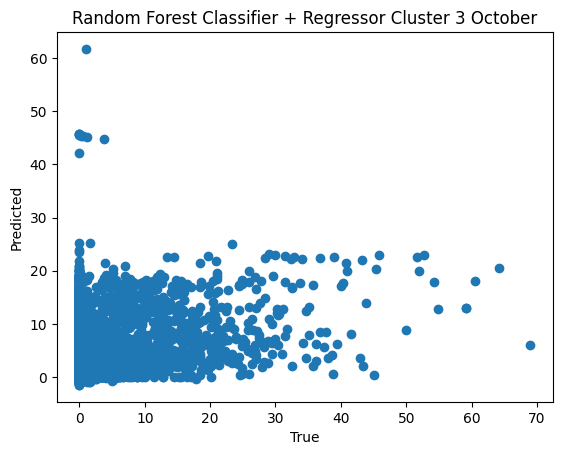

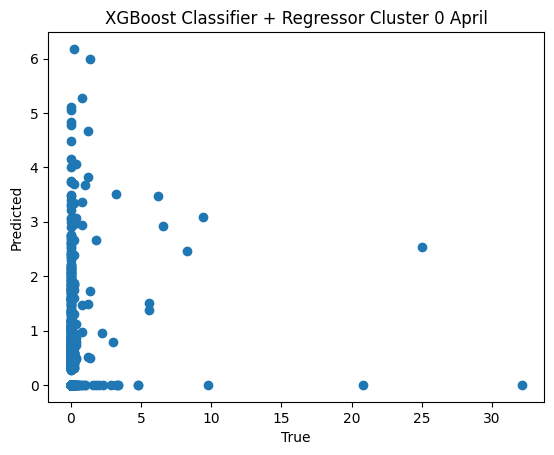

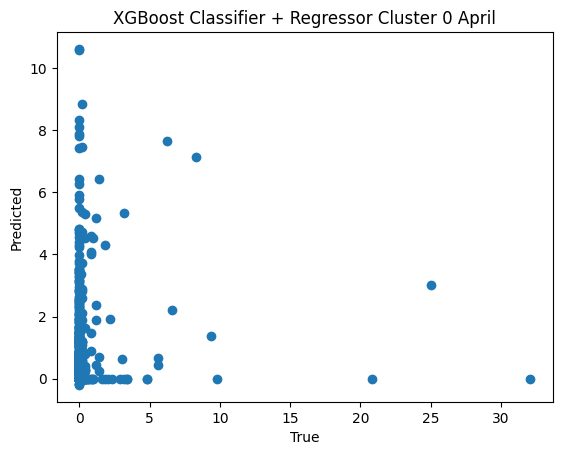

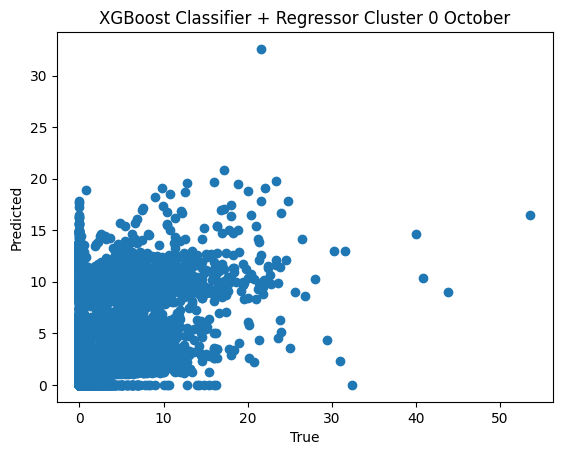

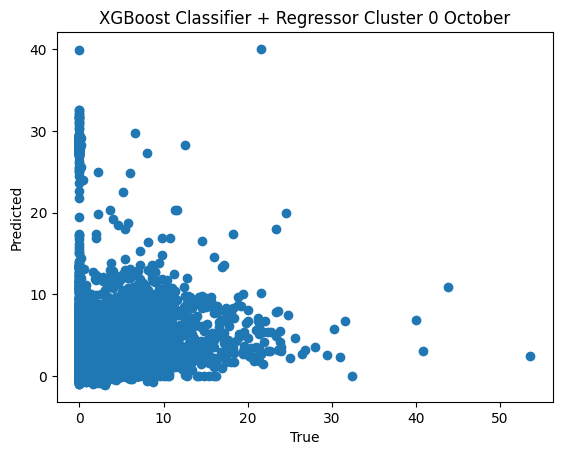

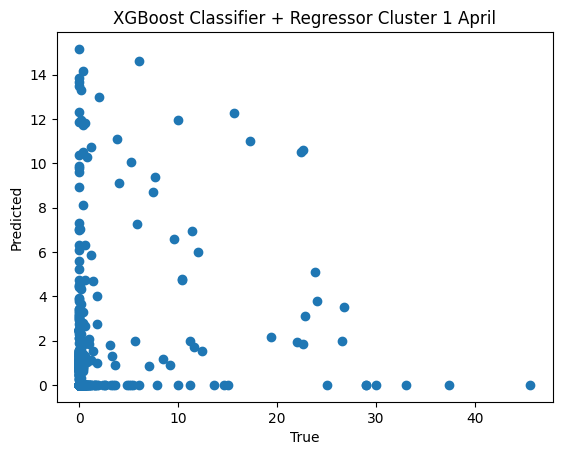

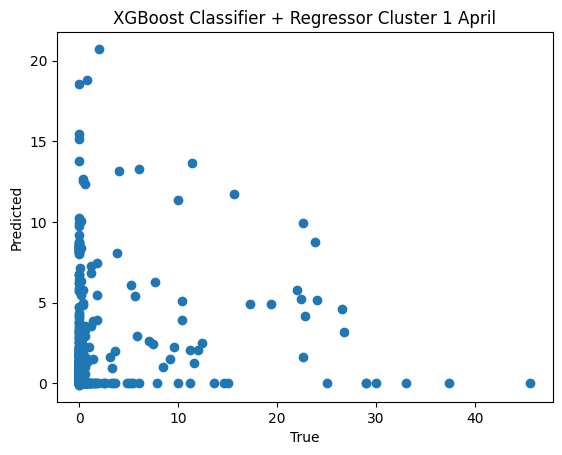

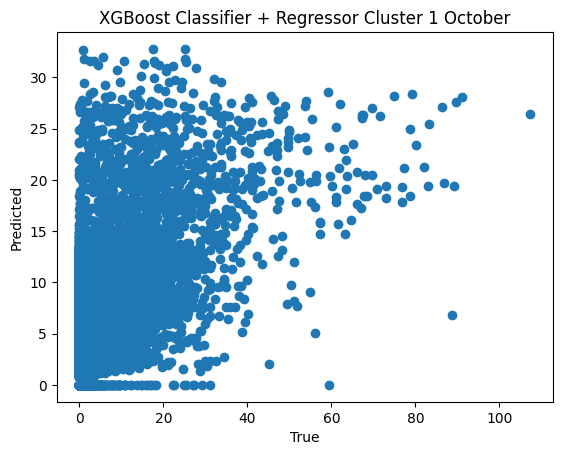

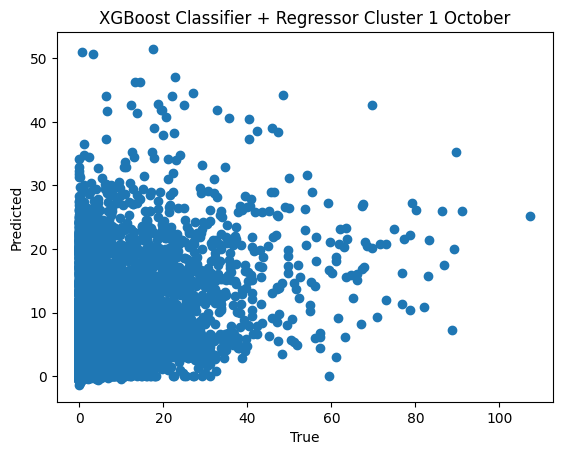

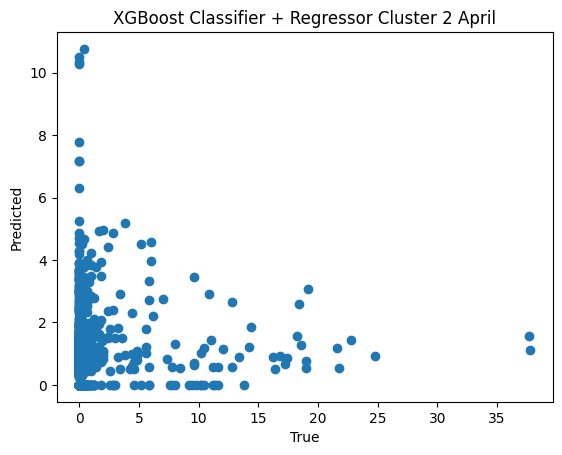

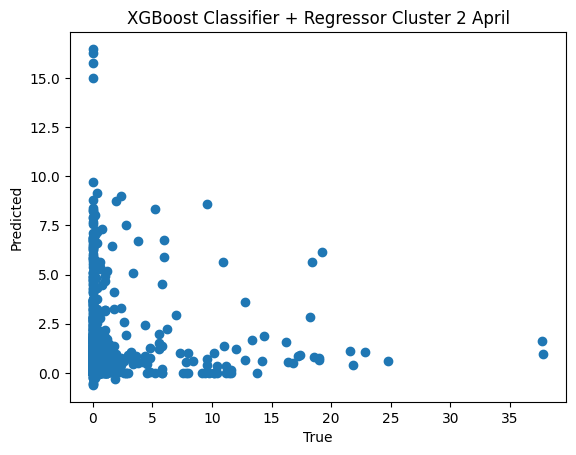

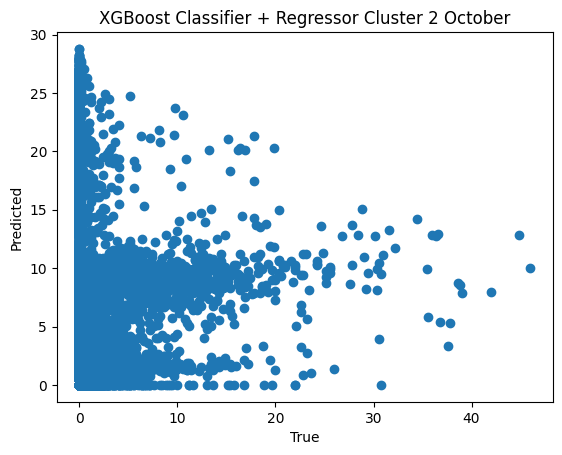

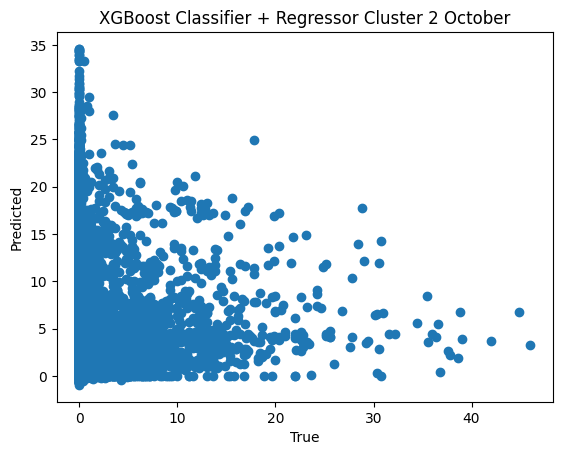

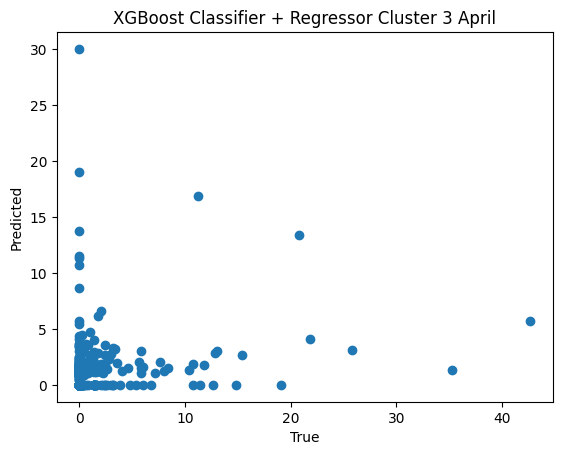

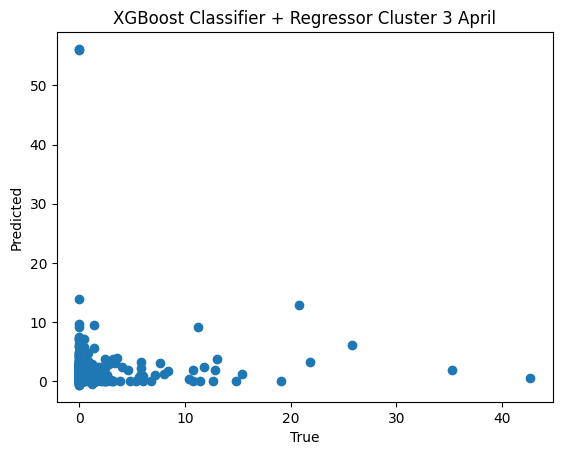

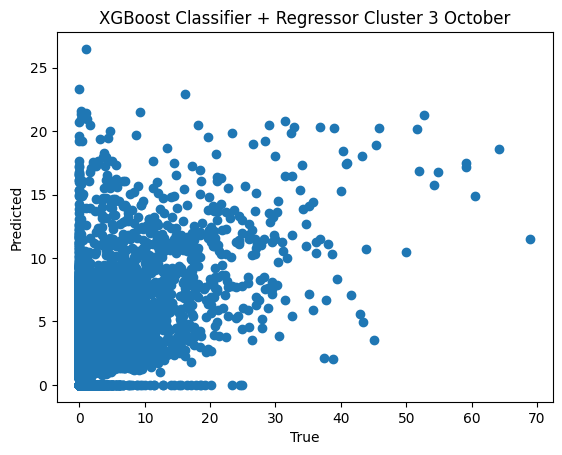

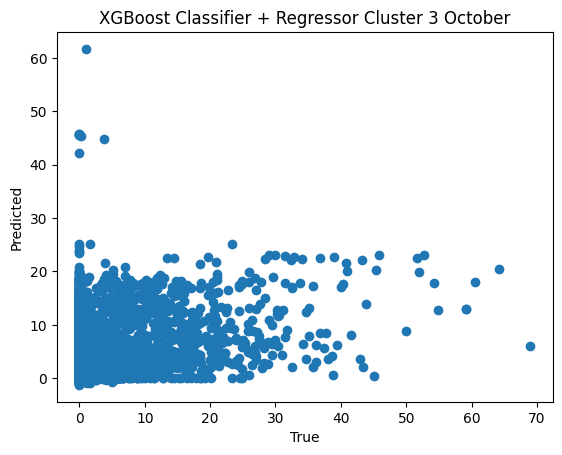

<Figure size 640x480 with 0 Axes>

In [25]:
# Random Forest Classifier + Regressor
april_prediction_scores_combined_rfc = dict()
october_prediction_scores_combined_rfc = dict()
for cluster in range(N_CLUSTERS):
    X_4, y_4 = test_4_clustered_list[cluster]
    X_10, y_10 = test_10_clustered_list[cluster]
    rfc_4 = april_models_classification[cluster][0]
    rfr_4, xgbr_4 = april_models_rain_only[cluster]
    rfc_10 = october_models_classification[cluster][0]
    rfr_10, xgbr_10 = october_models_rain_only[cluster]
    rfc_4_pred = rfc_4.predict(X_4)
    rfc_10_pred = rfc_10.predict(X_10)
    rfr_4_pred = rfr_4.predict(X_4)
    rfr_10_pred = rfr_10.predict(X_10)
    xgbr_4_pred = xgbr_4.predict(X_4)
    xgbr_10_pred = xgbr_10.predict(X_10)
    # Merge the predictions where rfc is 0 when rfc is 0, otherwise use rfr and xgbr
    rfc_rfr_4_pred = np.where(rfc_4_pred == 0, rfc_4_pred, rfr_4_pred)
    rfc_xgbr_4_pred = np.where(rfc_4_pred == 0, rfc_4_pred, xgbr_4_pred)
    rfc_rfr_10_pred = np.where(rfc_10_pred == 0, rfc_10_pred, rfr_10_pred)
    rfc_xgbr_10_pred = np.where(rfc_10_pred == 0, rfc_10_pred, xgbr_10_pred)
    draw_scatter_plot(y_4, rfc_rfr_4_pred, f"Random Forest Classifier + Random Forest Regressor Cluster {cluster} April", "rfc_rfr", "april", cluster, "combined")
    draw_scatter_plot(y_4, rfc_xgbr_4_pred, f"Random Forest Classifier + XGBoost Regressor Cluster {cluster} April", "rfc_xgbr", "april", cluster, "combined")
    draw_scatter_plot(y_10, rfc_rfr_10_pred, f"Random Forest Classifier + Random Forest Regressor Cluster {cluster} October", "rfc_rfr", "october", cluster, "combined")
    draw_scatter_plot(y_10, rfc_xgbr_10_pred, f"Random Forest Classifier + XGBoost Regressor Cluster {cluster} October", "rfc_xgbr", "october", cluster, "combined")
    april_prediction_scores_combined_rfc[f"rfc_rfr_{cluster}"] = [root_mean_squared_error(y_4, rfc_rfr_4_pred), r2_score(y_4, rfc_rfr_4_pred), mean_absolute_error(y_4, rfc_rfr_4_pred)]
    april_prediction_scores_combined_rfc[f"rfc_xgbr_{cluster}"] = [root_mean_squared_error(y_4, rfc_xgbr_4_pred), r2_score(y_4, rfc_xgbr_4_pred), mean_absolute_error(y_4, rfc_xgbr_4_pred)]
    october_prediction_scores_combined_rfc[f"rfc_rfr_{cluster}"] = [root_mean_squared_error(y_10, rfc_rfr_10_pred), r2_score(y_10, rfc_rfr_10_pred), mean_absolute_error(y_10, rfc_rfr_10_pred)]
    october_prediction_scores_combined_rfc[f"rfc_xgbr_{cluster}"] = [root_mean_squared_error(y_10, rfc_xgbr_10_pred), r2_score(y_10, rfc_xgbr_10_pred), mean_absolute_error(y_10, rfc_xgbr_10_pred)]

# Convert to pandas dataframe
april_prediction_scores_combined_rfc_df = pd.DataFrame(april_prediction_scores_combined_rfc, index=["rmse", "r2", "mae"])
october_prediction_scores_combined_rfc_df = pd.DataFrame(october_prediction_scores_combined_rfc, index=["rmse", "r2", "mae"])

# Save the results
april_prediction_scores_combined_rfc_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_april_prediction_scores_combined_rfc_df.csv")
october_prediction_scores_combined_rfc_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_october_prediction_scores_combined_rfc_df.csv")

# XGBoost Classifier + Regressor
april_prediction_scores_combined_xgb = dict()
october_prediction_scores_combined_xgb = dict()

for cluster in range(N_CLUSTERS):
    X_4, y_4 = test_4_clustered_list[cluster]
    X_10, y_10 = test_10_clustered_list[cluster]
    xgb_4 = april_models_classification[cluster][1]
    rfr_4, xgbr_4 = april_models_rain_only[cluster]
    xgb_10 = october_models_classification[cluster][1]
    rfr_10, xgbr_10 = october_models_rain_only[cluster]
    xgb_4_pred = xgb_4.predict(X_4)
    xgb_10_pred = xgb_10.predict(X_10)
    rfr_4_pred = rfr_4.predict(X_4)
    rfr_10_pred = rfr_10.predict(X_10)
    xgbr_4_pred = xgbr_4.predict(X_4)
    xgbr_10_pred = xgbr_10.predict(X_10)
    # Merge the predictions where xgb is 0 when xgb is 0, otherwise use rfr and xgbr
    xgb_rfr_4_pred = np.where(xgb_4_pred == 0, xgb_4_pred, rfr_4_pred)
    xgb_xgbr_4_pred = np.where(xgb_4_pred == 0, xgb_4_pred, xgbr_4_pred)
    xgb_rfr_10_pred = np.where(xgb_10_pred == 0, xgb_10_pred, rfr_10_pred)
    xgb_xgbr_10_pred = np.where(xgb_10_pred == 0, xgb_10_pred, xgbr_10_pred)
    draw_scatter_plot(y_4, xgb_rfr_4_pred, f"XGBoost Classifier + Random Forest Regressor Cluster {cluster} April", "xgb_rfr", "april", cluster, "combined")
    draw_scatter_plot(y_4, xgb_xgbr_4_pred, f"XGBoost Classifier + XGBoost Regressor Cluster {cluster} April", "xgb_xgbr", "april", cluster, "combined")
    draw_scatter_plot(y_10, xgb_rfr_10_pred, f"XGBoost Classifier + Random Forest Regressor Cluster {cluster} October", "xgb_rfr", "october", cluster, "combined")
    draw_scatter_plot(y_10, xgb_xgbr_10_pred, f"XGBoost Classifier + XGBoost Regressor Cluster {cluster} October", "xgb_xgbr", "october", cluster, "combined")
    april_prediction_scores_combined_xgb[f"xgb_rfr_{cluster}"] = [root_mean_squared_error(y_4, xgb_rfr_4_pred), r2_score(y_4, xgb_rfr_4_pred), mean_absolute_error(y_4, xgb_rfr_4_pred)]
    april_prediction_scores_combined_xgb[f"xgb_xgbr_{cluster}"] = [root_mean_squared_error(y_4, xgb_xgbr_4_pred), r2_score(y_4, xgb_xgbr_4_pred), mean_absolute_error(y_4, xgb_xgbr_4_pred)]
    october_prediction_scores_combined_xgb[f"xgb_rfr_{cluster}"] = [root_mean_squared_error(y_10, xgb_rfr_10_pred), r2_score(y_10, xgb_rfr_10_pred), mean_absolute_error(y_10, xgb_rfr_10_pred)]
    october_prediction_scores_combined_xgb[f"xgb_xgbr_{cluster}"] = [root_mean_squared_error(y_10, xgb_xgbr_10_pred), r2_score(y_10, xgb_xgbr_10_pred), mean_absolute_error(y_10, xgb_xgbr_10_pred)]

# Convert to pandas dataframe
april_prediction_scores_combined_xgb_df = pd.DataFrame(april_prediction_scores_combined_xgb, index=["rmse", "r2", "mae"])
october_prediction_scores_combined_xgb_df = pd.DataFrame(october_prediction_scores_combined_xgb, index=["rmse", "r2", "mae"])

# Save the results
april_prediction_scores_combined_xgb_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_april_prediction_scores_combined_xgb_df.csv")
october_prediction_scores_combined_xgb_df.to_csv(RESULT_PATH + f"traditional_ml-ts{TIME_STEP}_fs{FUTURE_STEP}_october_prediction_scores_combined_xgb_df.csv")